In [94]:
##Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import  scipy.stats as stats  
from scipy.stats import chisquare,chi2_contingency

In [5]:
##Read the data as a data frame
df_insurance = pd.iris_df=pd.read_csv("insurance.csv")

In [7]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
##Shape of the data
df_insurance.shape

(1338, 7)

It shows that data is having seven fields on which it will be analysed and we have total 1338 data .

In [14]:
##Data type of each attribute
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [19]:
##Checking the presence of missing values
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

As we got 0 so we can say that we dont have any missing values.

In [21]:
##5 point summary of numerical attributes
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


So by the help of describe we got the 5 point summary i.e. Min,Max,25%,50%,75% for the numeric data.

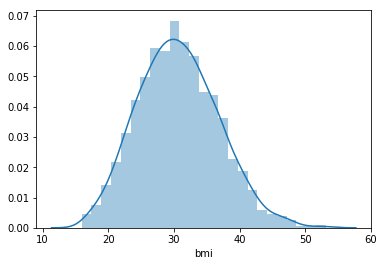

In [42]:
##Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
sns.distplot(df_insurance['bmi'])
plt.show()

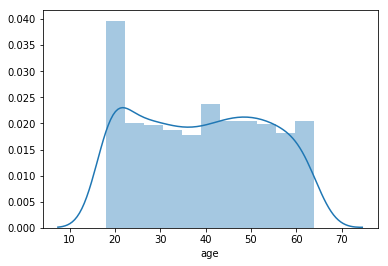

In [43]:
sns.distplot(df_insurance['age'])
plt.show()

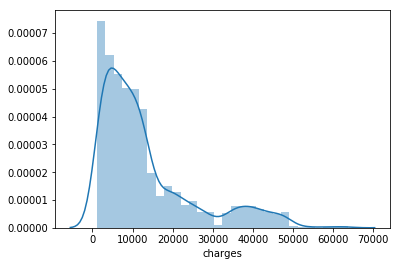

In [44]:
sns.distplot(df_insurance['charges'])
plt.show()

In [41]:
##Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
print("Skewness of ‘bmi’ is :",df_insurance['bmi'].skew(axis = 0, skipna = True))
print("Skewness of ‘age’ is :",df_insurance['age'].skew(axis = 0, skipna = True))
print("Skewness of ‘charges’ is :",df_insurance['charges'].skew(axis = 0, skipna = True))

Skewness of ‘bmi’ is : 0.2840471105987448
Skewness of ‘age’ is : 0.05567251565299186
Skewness of ‘charges’ is : 1.5158796580240388


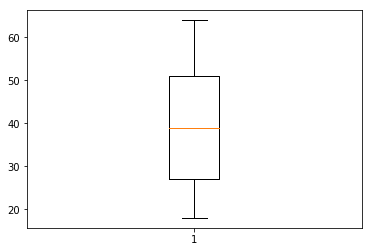

In [40]:
##Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns
plt.boxplot(df_insurance['age'])
plt.show() 


So this graph show that we don't have any outliers.

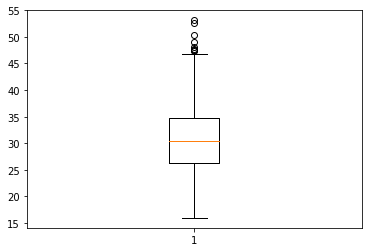

In [29]:
plt.boxplot(df_insurance['bmi']) 
plt.show() 

So this graph show that we have high outliers

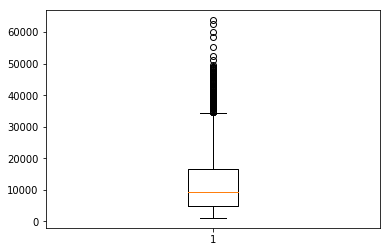

In [30]:
plt.boxplot(df_insurance['charges']) 
plt.show()

So this graph show that we have very high outliers

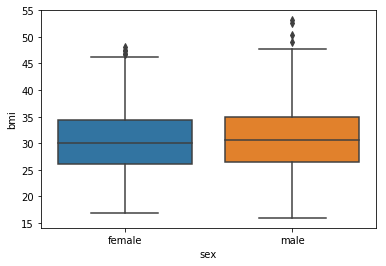

In [125]:
sns.boxplot(x = "sex", y = "bmi", data = df_insurance)
plt.show()

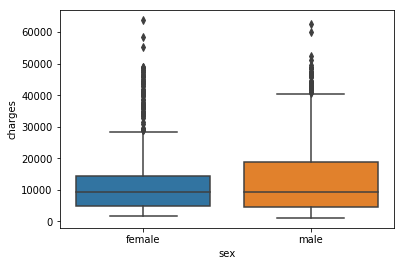

In [126]:
sns.boxplot(x = "sex", y = "charges", data = df_insurance)
plt.show()

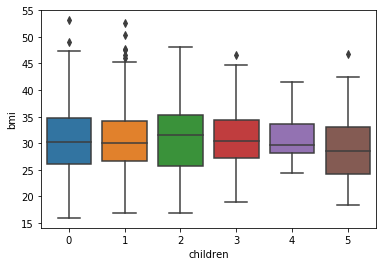

In [127]:
sns.boxplot(x = "children", y = "bmi", data = df_insurance)
plt.show()

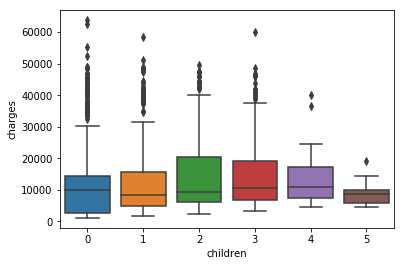

In [128]:
sns.boxplot(x = "children", y = "charges", data = df_insurance)
plt.show()

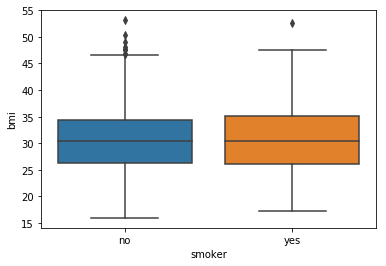

In [129]:
sns.boxplot(x = "smoker", y = "bmi", data = df_insurance)
plt.show()

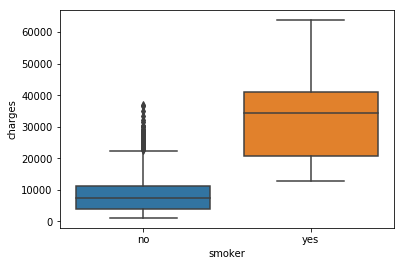

In [130]:
sns.boxplot(x = "smoker", y = "charges", data = df_insurance)
plt.show()

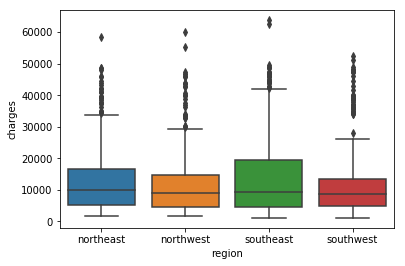

In [132]:
sns.boxplot(x = "region", y = "charges", data = df_insurance)
plt.show()

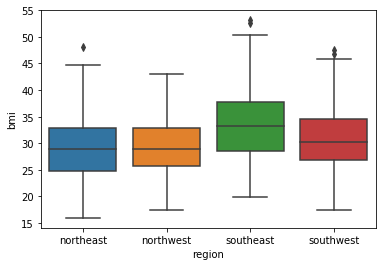

In [133]:
sns.boxplot(x = "region", y = "bmi", data = df_insurance)
plt.show()

In [123]:
##Pair plot that includes all the columns of the dataframe

df_insurance['sex']=df_insurance['sex'].astype('category')
df_insurance['children']=df_insurance['children'].astype('int')
df_insurance['smoker']=df_insurance['smoker'].astype('category')
df_insurance['region']=df_insurance['region'].astype('category')
df_insurance['sex_cate'] = df_insurance['sex'].cat.codes
df_insurance['smoker_cate'] = df_insurance['smoker'].cat.codes
df_insurance['region_cate'] = df_insurance['region'].cat.codes
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,sex_cate,smoker_cate,region_cate
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


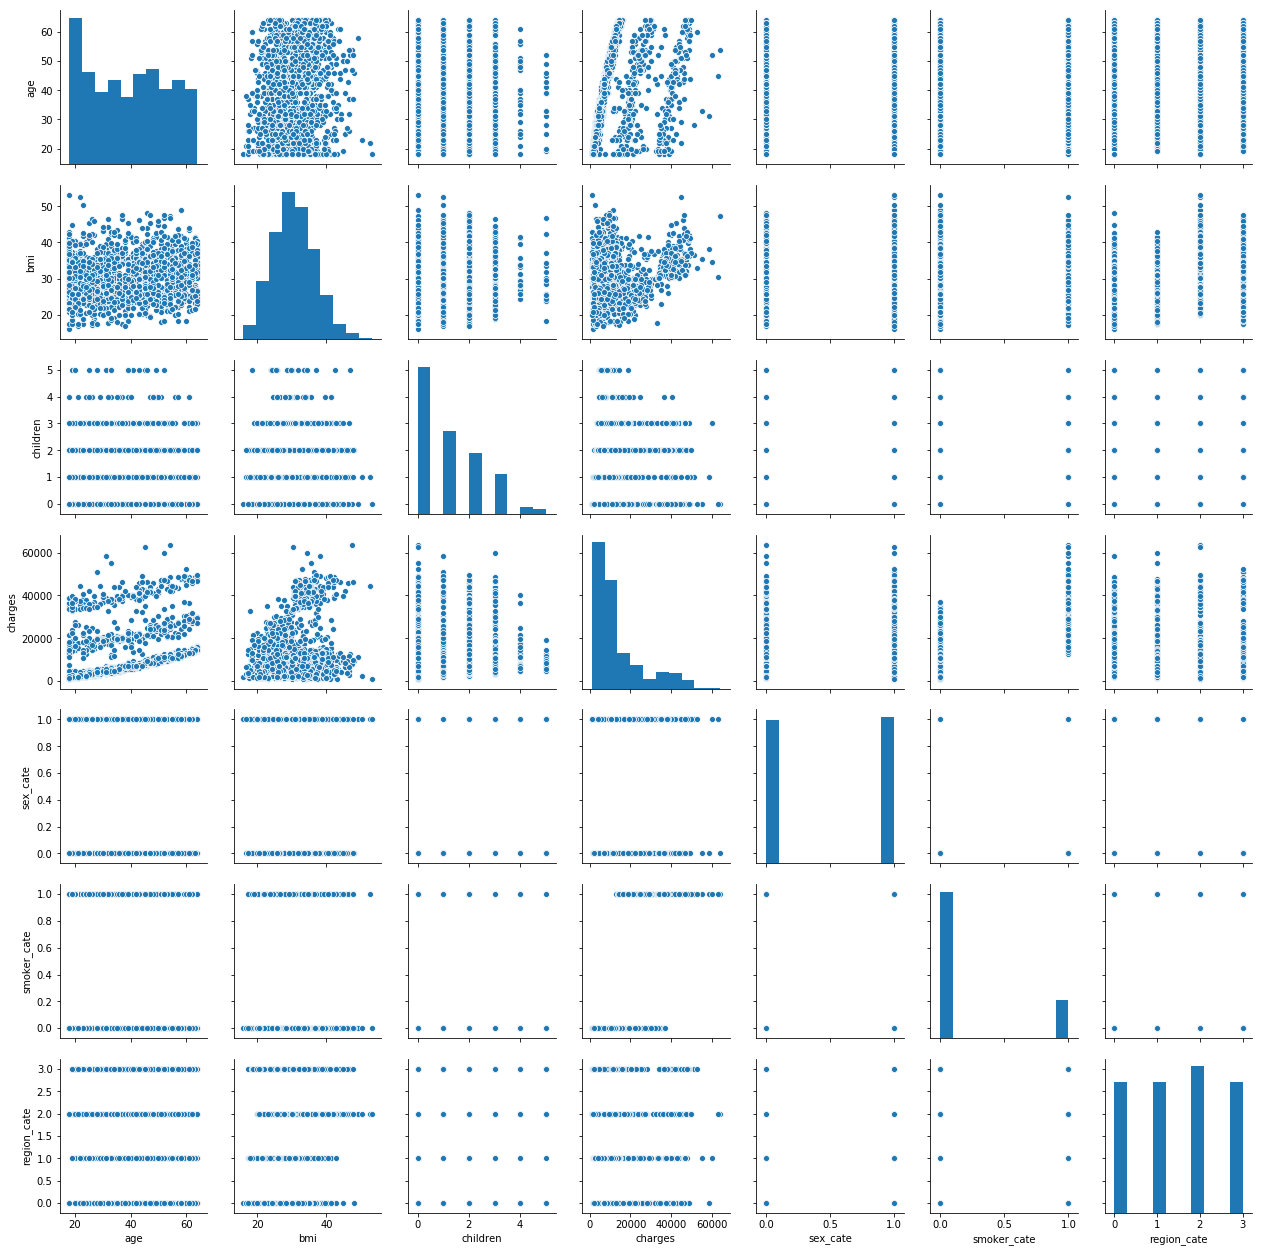

In [124]:
sns.pairplot(df_insurance)

In [78]:
##Do charges of people who smoke differ significantly from the people who don't?
df_smoker=df_insurance.loc[df_insurance['smoker'] == 'yes' , ['charges']]
df_NONsmoker=df_insurance.loc[df_insurance['smoker'] == 'no' , ['charges']]


H0 : Charges of people who smoke does not differ significantly from the people who don't

H1 : Do charges of people who smoke differ significantly from the people who don't

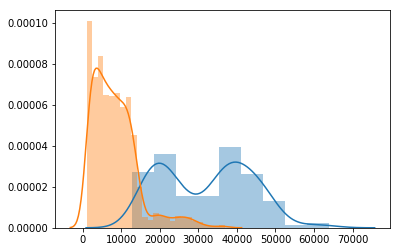

In [93]:
sns.distplot(df_smoker)
sns.distplot(df_NONsmoker)
plt.show()

As data is not normally distributed so we have normalized the data by the help of zscore.

In [91]:
zscore_smoker = stats.zscore(df_smoker, axis = 0)
zscore_NONsmoker = stats.zscore(df_NONsmoker, axis = 0)
t_statistic, p_value  =  stats.ttest_ind(zscore_smoker,zscore_NONsmoker)
print('P Value %1.3f' % p_value) 

P Value 1.000


In [81]:
##Does bmi of males differ significantly from that of females?
df_mbmi=df_insurance.loc[df_insurance['sex'] == 'male' , ['bmi']]
df_fbmi=df_insurance.loc[df_insurance['sex'] == 'female' , ['bmi']]

H0 : BMI of male does not differ significantly from that of female

H1 : BMI of male differ significantly from that of female

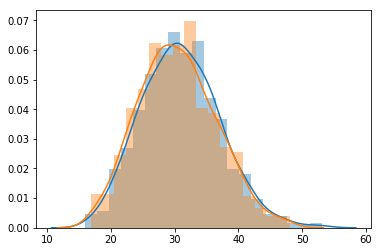

In [89]:
sns.distplot(df_mbmi)
sns.distplot(df_fbmi)
plt.show()

As data is normally distributed so we need not to normalize the data.

In [85]:
t_statistic, p_value  =  stats.ttest_ind(df_mbmi,df_fbmi)
print('P Value %1.3f' % p_value)

P Value 0.090


So the statistical decision is to accept the null hypothesis as 0.09 > 0.05

In [101]:
##Is the proportion of smokers significantly different in different genders?
cont = pd.crosstab(df_insurance['sex'],df_insurance['smoker'])

In [99]:
# H0: the proportion of smokers not different in different genders
# Ha: the proportion of smokers significantly different in different genders

In [97]:
chi2_contingency(cont)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 537.56651719],
        [135.56651719, 138.43348281]]))

The p-value < 0.05 hence we conclude that the proportion of smokers significantly different in different genders

In [102]:
##Is the distribution of bmi across women with no children, one child and two children, the same ?
cont1 = pd.crosstab(df_insurance['children'],df_insurance['bmi'])

H0 : the distribution of bmi across women with no children, one child and two children, the same

H1 : the distribution of bmi across women with no children, one child and two children, not same

In [103]:
chi2_contingency(cont1)

(2771.3658999203144,
 0.3090509867763566,
 2735,
 array([[0.42899851, 0.85799701, 0.42899851, ..., 0.42899851, 0.42899851,
         0.42899851],
        [0.24215247, 0.48430493, 0.24215247, ..., 0.24215247, 0.24215247,
         0.24215247],
        [0.1793722 , 0.35874439, 0.1793722 , ..., 0.1793722 , 0.1793722 ,
         0.1793722 ],
        [0.11733931, 0.23467862, 0.11733931, ..., 0.11733931, 0.11733931,
         0.11733931],
        [0.0186846 , 0.03736921, 0.0186846 , ..., 0.0186846 , 0.0186846 ,
         0.0186846 ],
        [0.01345291, 0.02690583, 0.01345291, ..., 0.01345291, 0.01345291,
         0.01345291]]))

p> 0.05 hence the distribution of bmi across women with no children, one child and two children, the same 